In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pathlib
from matplotlib.lines import Line2D
from PIL import Image

%matplotlib inline


In [2]:
_METRICS_FILE = './files/benchmark'
_METRIC = 'accuracy'

## Read file with metrics

In [3]:
try:
    #read csv file
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except OSError as err:
    # if there is no csv file we read the excel file
    excel_file = pd.read_excel(_METRICS_FILE+'.xlsx')
    # transform the excel file in a csv file
    excel_file.to_csv(_METRICS_FILE+'.csv', index=False)
    # read the new csv file 
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except:
    print("ERROR WHILE READING METRICS FILE")


In [4]:
metrics['total_time_s'] = metrics.apply(lambda row: row['train_time_s']+row['test_time_s'], axis=1)

In [5]:
metrics.sample(5)

dataset                     classifier     total  tp  tn  fp  fn  \
1123   ScreenType  MOA_WeightedMajorityAlgorithm     750.0 NaN NaN NaN NaN   
676        Mallat                 MOA_NaiveBayes    2400.0 NaN NaN NaN NaN   
482         FordB                        MOA_SGD    4446.0 NaN NaN NaN NaN   
270   ECGFiveDays                 MOA_NaiveBayes     884.0 NaN NaN NaN NaN   
2002     susy100k              MOA_DecisionStump  100000.0 NaN NaN NaN NaN   

      precision  recall  f1  fbeta  accuracy  train_time_s  test_time_s  \
1123        NaN     NaN NaN    NaN  0.337817      0.233277     0.128272   
676         NaN     NaN NaN    NaN  0.889466      0.038644     0.884832   
482         NaN     NaN NaN    NaN  0.498246      0.009237     0.002394   
270         NaN     NaN NaN    NaN  0.838678      0.000870     0.006087   
2002        NaN     NaN NaN    NaN  0.702596      0.041190     0.003706   

      total_time_s  
1123      0.361549  
676       0.923476  
482       0.011631  
270       0.006957  
2002      0.044896

## Useful variables

In [6]:
family_label = {'NN'  : 'Neural_Network',
                'LM'  : 'Linear_Model',
                'NB'  : 'Naive_Bayes',
                'DC'  : 'Dummy_Classifier',
                'DT'  : 'Decision_Trees',
                'MC'  : 'Meta_Classifier',
               }
classifier_family = {'keras_parallel_3_Dilated_Conv':'NN',
                   'keras_3_Dilated_Conv':'NN',
                   'sklearn_MLPClassifier':'NN',
                   'sklearn_Perceptron':'LM',
                   'sklearn_SGDClassifier':'LM',
                   'sklearn_BernoulliNB':'NB',
                   'sklearn_PassiveAggressiveClassifier':'LM',
                   'MOA_MajorityClass':'DC',
                   'MOA_RandomHoeffdingTree':'DT',
                   'MOA_NaiveBayes':'NB',
                   'MOA_SPegasos':'LM',
                   'MOA_OzaBagAdwin':'MC',
                   'MOA_OzaBoost':'MC',
                   'MOA_OzaBag':'MC',
                   'MOA_OCBoost':'MC',
                   'MOA_SingleClassifierDrift':'MC',
                   'MOA_WeightedMajorityAlgorithm':'MC',
                   'MOA_OzaBoostAdwin':'MC',
                   'MOA_Perceptron':'LM',
                   'MOA_HoeffdingAdaptiveTree':'NB',
                   'MOA_HoeffdingOptionTree':'NB',
                   'MOA_LeveragingBag':'MC',
                   'MOA_DecisionStump':'DT',
                   'MOA_OzaBagASHT':'MC',
                   'MOA_SGD':'LM',
                   'MOA_AdaHoeffdingOptionTree':'DT',
                   'MOA_ASHoeffdingTree':'DT',
                   'MOA_ActiveClassifier':'DC',
                   'MOA_HoeffdingTree':'DT'
                  }
#classifier_family = {'keras_3_Dilated_Conv':'NN',
#                   'keras_parallel_3_Dilated_Conv':'NN'
#                  }

family_classifier = {l:[k for k,v in classifier_family.items() if v == l] for l in family_label.keys()}
family_color = {'NN'  : 'k',
                'LM'  : 'b',
                'NB'  : 'g',
                'DC'  : 'y',
                'DT'  : 'r',
                'MC'  : 'm',
               }
line_style = ['-','--', '-.', ':', '>-','o--', 'x-.', '^:', 'o-','x--', '^-.', '>:', 'x-','^--', '>-.', 'o:', '^-','>--', 'o-.', 'x:']
classifier_to_compare = ['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv']


In [7]:
datasets = metrics['dataset'].unique()
classifiers = metrics['classifier'].unique()

In [8]:
directory = './files/'+_METRIC+'/'
pathlib.Path(directory).mkdir(parents=True, exist_ok=True)

## Estudio de los valores de _METRIC sin preprocesarlos

In [9]:
metrics_table = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
metrics_table = metrics_table.dropna()
metrics_table = metrics_table[list(classifier_family.keys())]
print(metrics_table.shape)

# Add mean row and save to file
metrics_table.loc['mean'] = metrics_table.mean()
metrics_table.to_csv(directory+'table_'+_METRIC+'.csv')
metrics_table = metrics_table.drop(index='mean')

metrics_table.tail()


(69, 29)


classifier  keras_parallel_3_Dilated_Conv  keras_3_Dilated_Conv  \
dataset                                                           
ozone                            0.939906              0.940187   
pendigits                        0.963173              0.959245   
pokerhand                        0.552046              0.885958   
spambase                         0.919762              0.979097   
susy100k                         0.758179              0.741637   

classifier  sklearn_MLPClassifier  sklearn_Perceptron  sklearn_SGDClassifier  \
dataset                                                                        
ozone                    0.903756            0.894836               0.900469   
pendigits                0.889235            0.777620               0.804533   
pokerhand                0.839095            0.633867               0.681359   
spambase                 0.980238            0.997857               0.998333   
susy100k                 0.788071            0.696245               0.722944   

classifier  sklearn_BernoulliNB  sklearn_PassiveAggressiveClassifier  \
dataset                                                                
ozone                  0.900469                             0.892019   
pendigits              0.622380                             0.826629   
pokerhand              0.501022                             0.689049   
spambase               0.940952                             0.997143   
susy100k               0.568732                             0.691555   

classifier  MOA_MajorityClass  MOA_RandomHoeffdingTree  MOA_NaiveBayes  \
dataset                                                                  
ozone                0.922494                 0.919036        0.701509   
pendigits            0.093271                 0.548241        0.862012   
pokerhand            0.477798                 0.640533        0.582045   
spambase             0.764171                 0.938167        0.917073   
susy100k             0.540525                 0.724223        0.733199   

classifier        ...          MOA_HoeffdingAdaptiveTree  \
dataset           ...                                      
ozone             ...                           0.919901   
pendigits         ...                           0.870616   
pokerhand         ...                           0.671141   
spambase          ...                           0.957066   
susy100k          ...                           0.767155   

classifier  MOA_HoeffdingOptionTree  MOA_LeveragingBag  MOA_DecisionStump  \
dataset                                                                     
ozone                      0.920765           0.918456           0.922494   
pendigits                  0.863660           0.891765           0.170211   
pokerhand                  0.744192           0.841178           0.514582   
spambase                   0.941442           0.993337           0.788444   
susy100k                   0.763448           0.781248           0.702596   

classifier  MOA_OzaBagASHT   MOA_SGD  MOA_AdaHoeffdingOptionTree  \
dataset                                                            
ozone             0.919036  0.922494                    0.920765   
pendigits         0.864849  0.104908                    0.863805   
pokerhand         0.742540  0.476933                    0.772422   
spambase          0.941413  0.261812                    0.941494   
susy100k          0.763952  0.540636                    0.767406   

classifier  MOA_ASHoeffdingTree  MOA_ActiveClassifier  MOA_HoeffdingTree  
dataset                                                                   
ozone                  0.920765              0.803548           0.920765  
pendigits              0.863829              0.758789           0.863829  
pokerhand              0.745107              0.583748           0.745107  
spambase               0.941494              0.795992           0.941494  
susy100k               0.765486              0.731917    

In [10]:
color = [family_color[classifier_family[classifier]] for classifier in classifier_family.keys()]
line = [line_style[family_classifier[classifier_family[classifier]].index(classifier)] for classifier in classifier_family.keys()]
style = [c+s for c,s in list(zip(color,line))]

### Plot _METRIC for each dataset

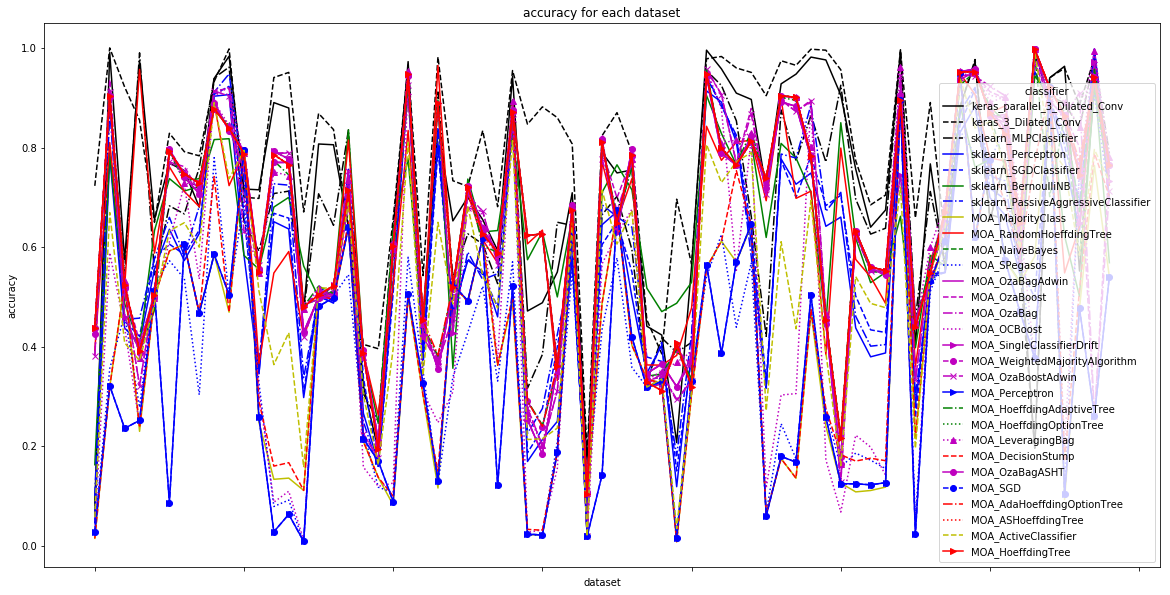

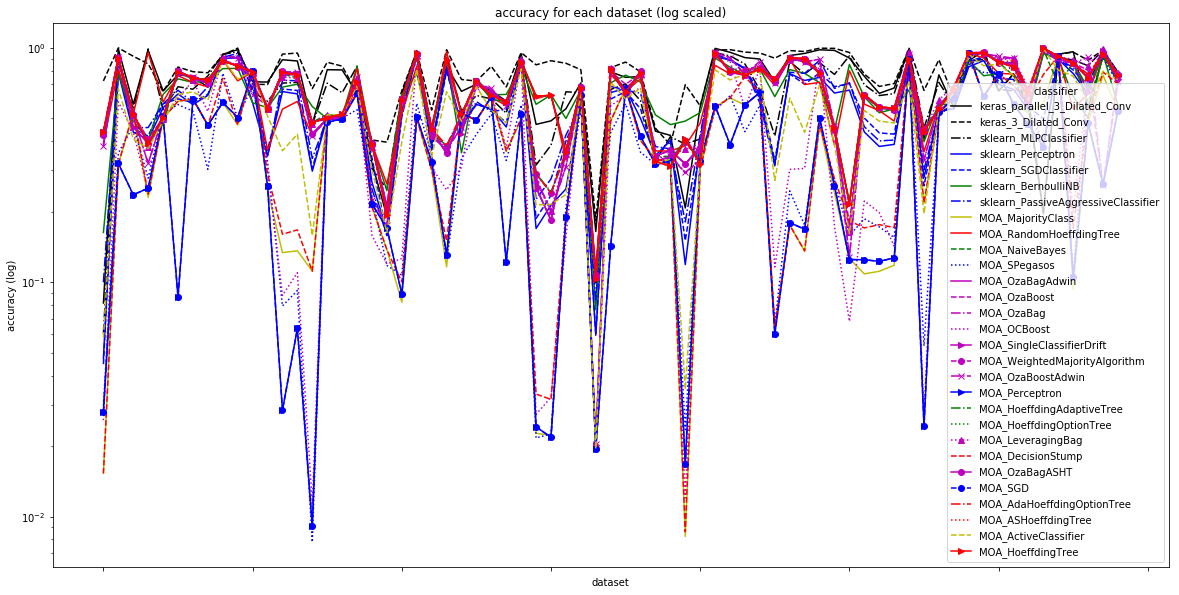

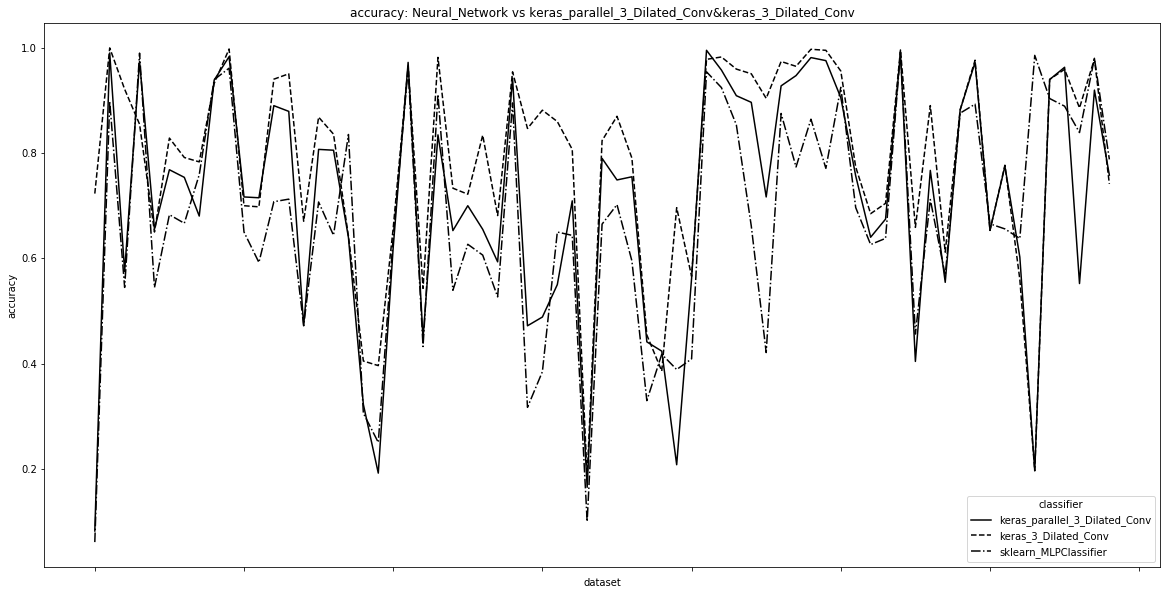

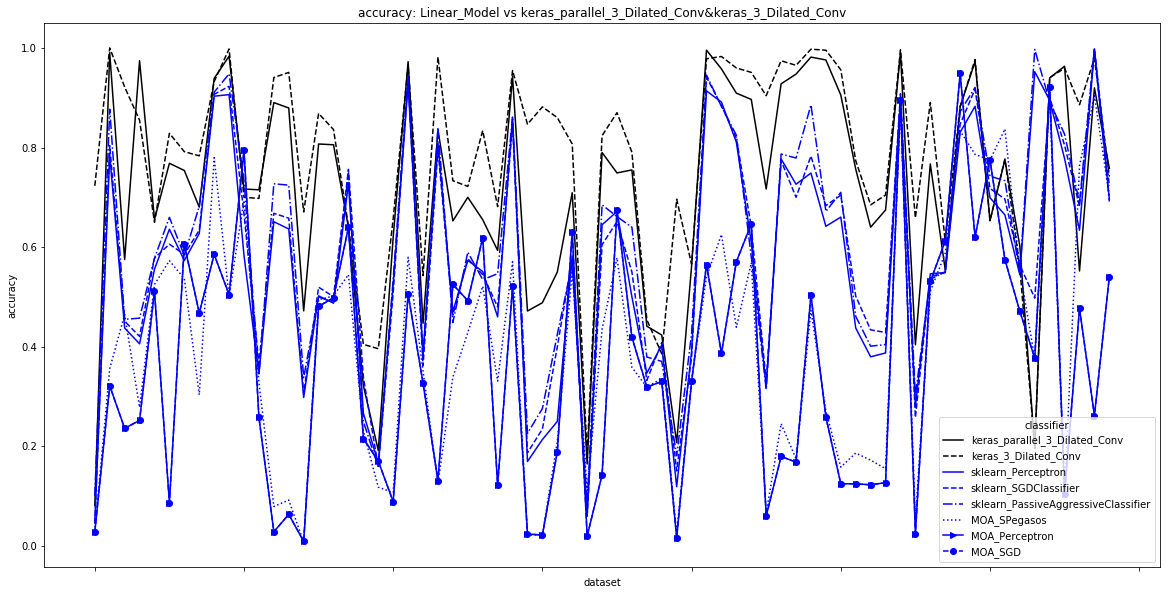

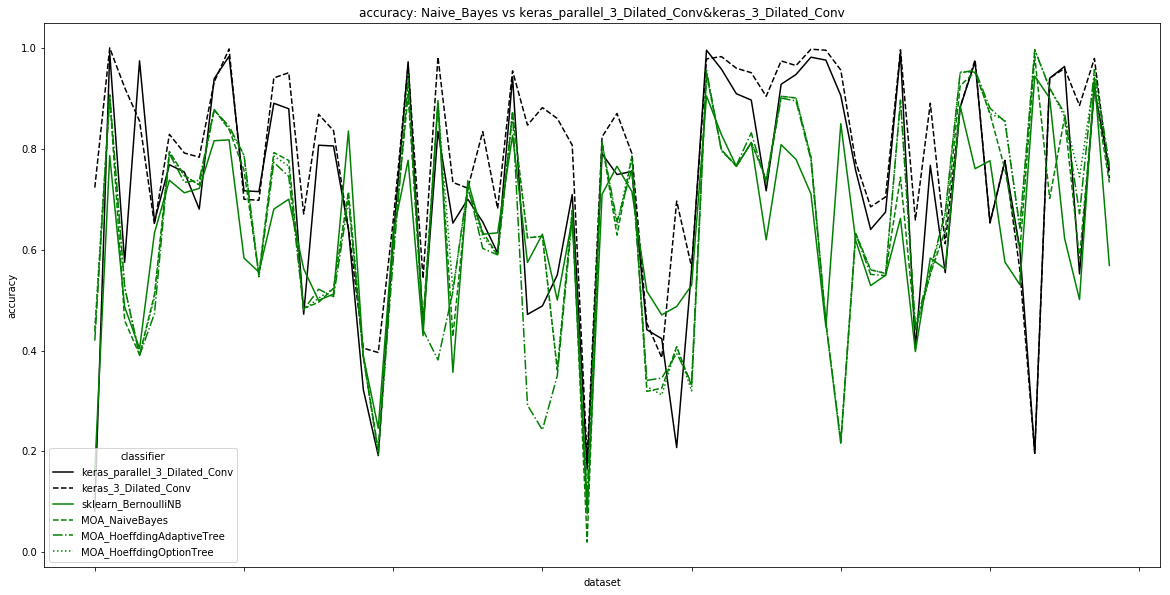

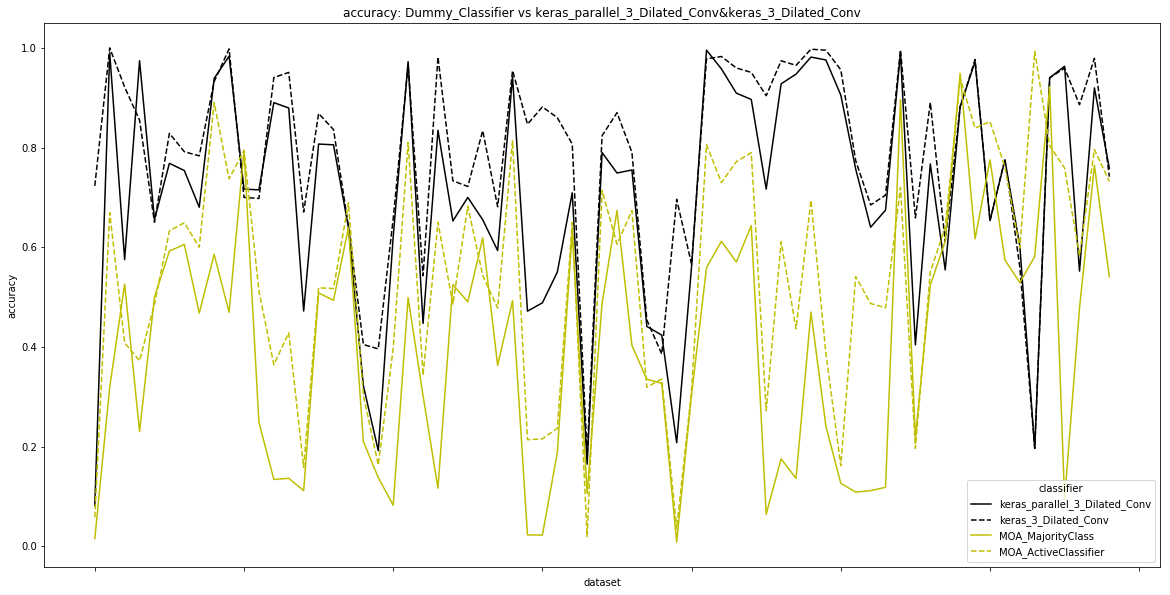

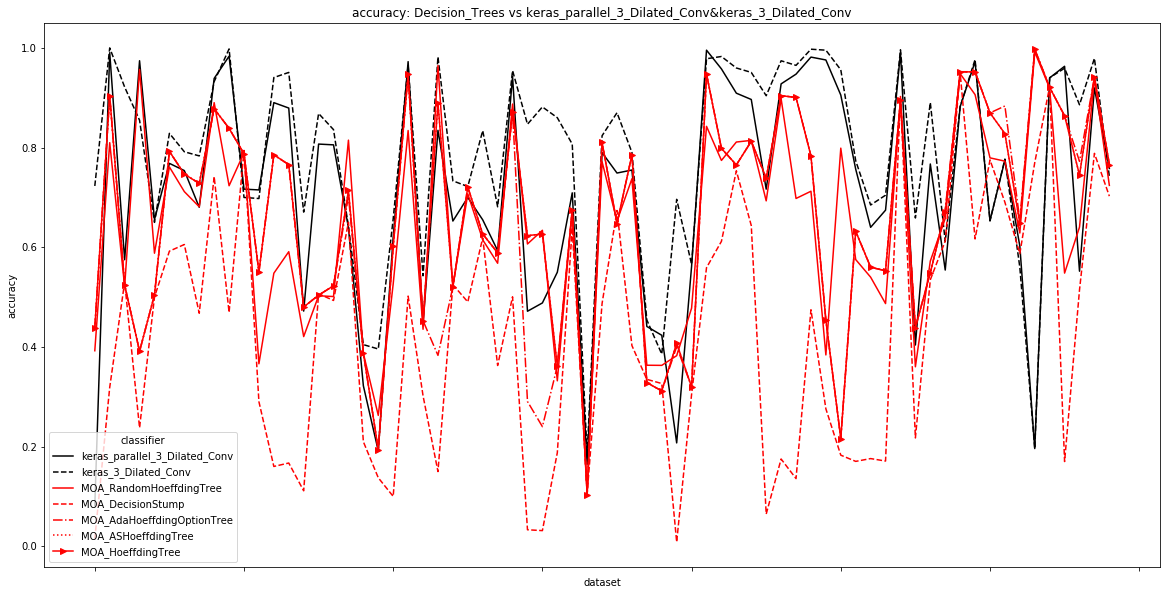

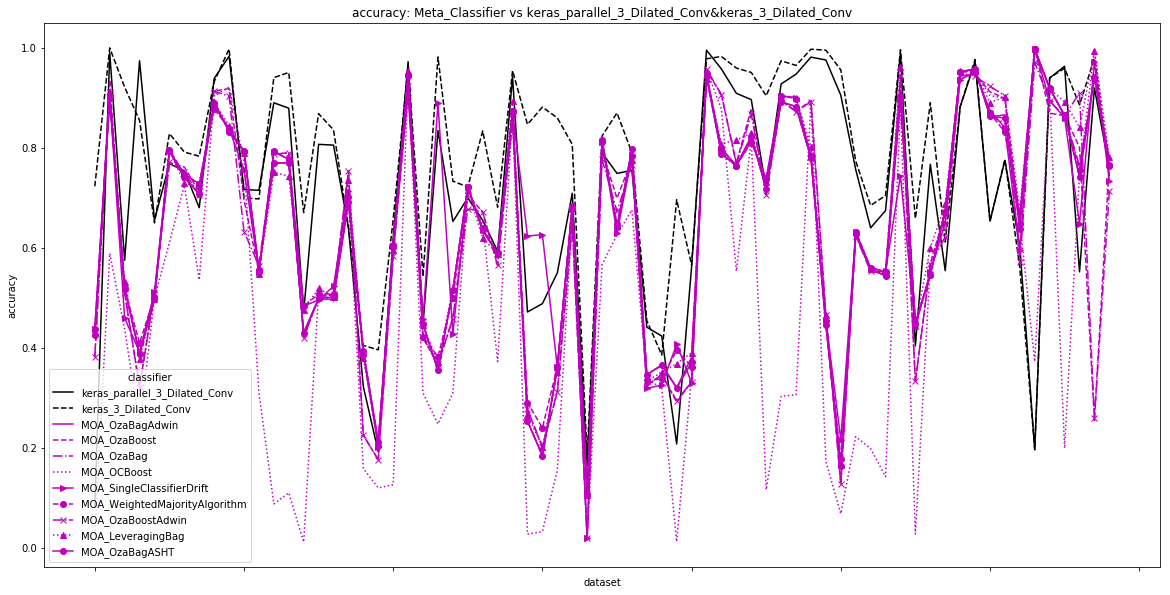

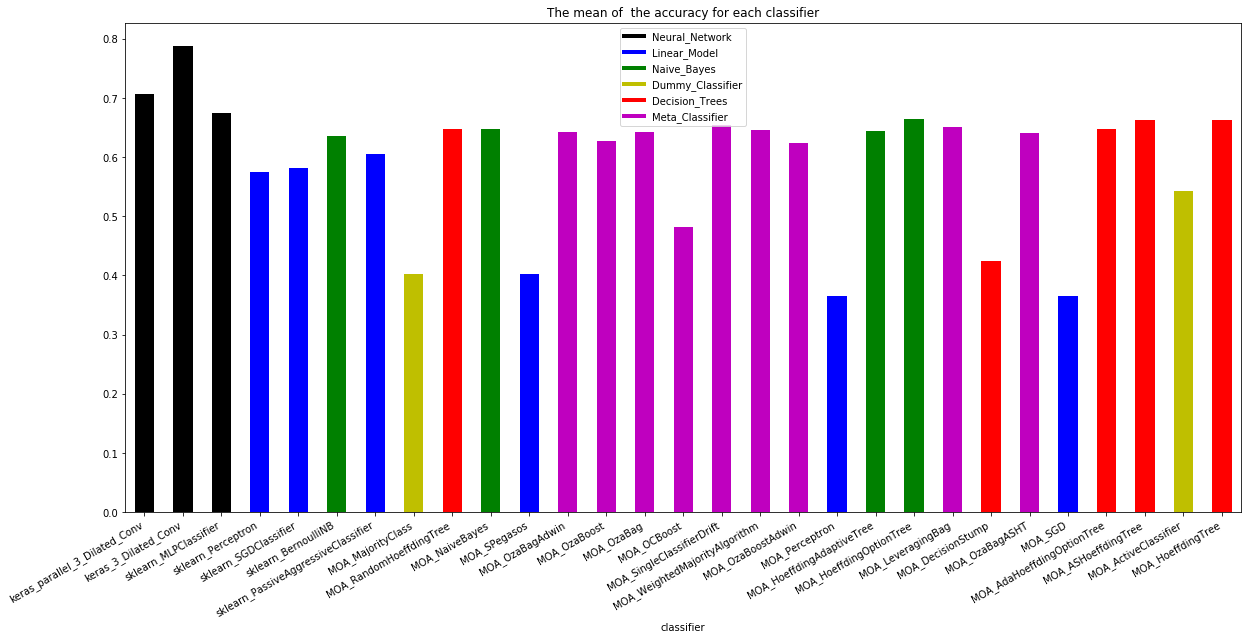

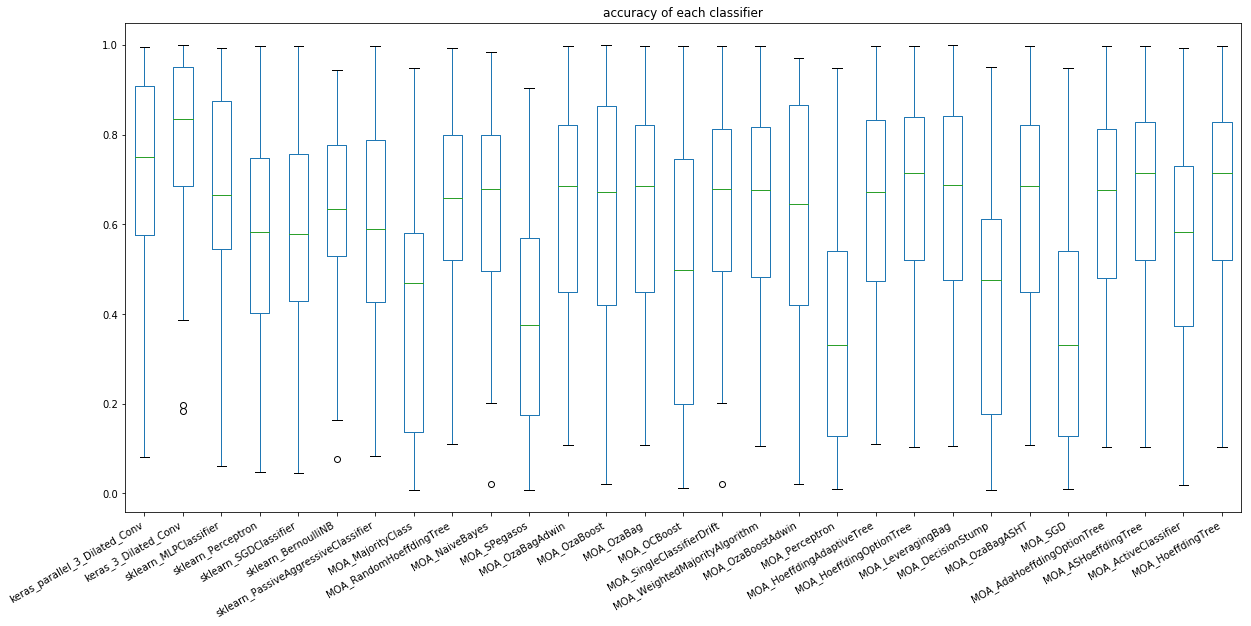

In [11]:
## Plot 
ax = metrics_table.plot(figsize=(20,10),   style=style, title= _METRIC+' for each dataset' )
ax.set_ylabel(_METRIC)
ax.get_figure().savefig(directory+'plot.png')
plt.show()

ax_log = metrics_table.plot(figsize=(20,10), logy=True,  style=style, title= _METRIC+' for each dataset (log scaled)' )
ax_log.set_ylabel(_METRIC+' (log)')
ax_log.get_figure().savefig(directory+'plot_log.png')
plt.show()

pdf_img_ls = [directory+'plot.png', directory+'plot_log.png' ]

for family in family_label.keys():
    classifiers_to_plot = [classifier for (classifier,f) in classifier_family.items() if f==family or classifier in classifier_to_compare]
    color_aux = [family_color[classifier_family[classifier]] for classifier in classifiers_to_plot]
    line_aux = [line_style[family_classifier[classifier_family[classifier]].index(classifier)] for classifier in classifiers_to_plot]
    style_aux = [c+s for c,s in list(zip(color_aux,line_aux))]
    metrics_table_aux = metrics_table[classifiers_to_plot]
    ax = metrics_table_aux.plot(figsize=(20,10), style=style_aux, title= _METRIC+': '+family_label[family]+' vs '+'&'.join(classifier_to_compare) )
    ax.set_ylabel(_METRIC)
    ax.get_figure().savefig(directory + 'plot_' + family +'.png')
    plt.show()
    pdf_img_ls.append(directory + 'plot_' + family +'.png')


## Bar plot (mean)
legend = [Line2D([0], [0], color=c, lw=4, label=family_label[f]) for f,c in family_color.items()]

ax = metrics_table.mean().plot.bar(figsize=(20,10), color=color, title= 'The mean of  the '+_METRIC+' for each classifier')
ax.legend(handles=legend)
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'mean.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'mean.png']
                           
#ax_log = metrics_table.mean().plot.bar(figsize=(20,10), color=color, logy=True, title= 'The mean of  the  '+_METRIC+' for each classifier (log scaled)')
#ax_log.legend(handles=legend)
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'mean_log.png')
#plt.show()
#pdf_img_ls = pdf_img_ls + [directory+'mean_log.png']

## Box Plot 
ax = metrics_table.plot.box(figsize=(20,10), title= _METRIC+' of each classifier')
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'box.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'box.png']
                           
#ax_log = metrics_table.plot.box(figsize=(20,10), logy=True, title= _METRIC+'  of each classifier (log scaled)')
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'box_log.png')
#plt.show()
#pdf_img_ls = pdf_img_ls + [directory+'box_log.png']

In [12]:
pdf_img_ls = [Image.open(i).convert('RGB') for i in pdf_img_ls]
pdf_filename = directory+_METRIC+'.pdf'
first = pdf_img_ls[0].copy()
first.save(pdf_filename,"PDF", resolution=100.0, save_all=True, append_images=pdf_img_ls[1:])
pdf_img_ls = []

### We divide the value for each minimum

In [13]:
metrics_table_min = metrics_table.min(axis=1)
metrics_table_proportionate = metrics_table.divide(metrics_table_min, axis=0)

# Add mean row and save to file
metrics_table_proportionate.loc['mean'] = metrics_table_proportionate.mean()
metrics_table_proportionate.to_csv(directory+'table_'+_METRIC+'_prop.csv')
metrics_table_proportionate = metrics_table_proportionate.drop(index='mean')

metrics_table_proportionate.head()

classifier             keras_parallel_3_Dilated_Conv  keras_3_Dilated_Conv  \
dataset                                                                      
Adiac                                       5.332053             47.260782   
CBF                                         3.103290              3.133419   
ChlorineConcentration                       2.435348              3.902466   
CinCECGtorso                                4.233945              3.715248   
Computers                                   1.384722              1.372987   

classifier             sklearn_MLPClassifier  sklearn_Perceptron  \
dataset                                                            
Adiac                               3.956040            3.096031   
CBF                                 2.814052            2.458529   
ChlorineConcentration               2.306747            1.853309   
CinCECGtorso                        4.302790            1.764144   
Computers                           1.150023            1.173493   

classifier             sklearn_SGDClassifier  sklearn_BernoulliNB  \
dataset                                                             
Adiac                               2.924029            10.664107   
CBF                                 2.518787             2.464555   
ChlorineConcentration               1.911017             2.060870   
CinCECGtorso                        1.828686             1.755538   
Computers                           1.220433             1.337782   

classifier             sklearn_PassiveAggressiveClassifier  MOA_MajorityClass  \
dataset                                                                         
Adiac                                             6.536066           1.000000   
CBF                                               2.747768           1.000000   
ChlorineConcentration                             1.927150           2.226584   
CinCECGtorso                                      1.987889           1.000000   
Computers                                         1.220433           1.056456   

classifier             MOA_RandomHoeffdingTree  MOA_NaiveBayes  \
dataset                                                          
Adiac                                25.653481       28.657743   
CBF                                   2.537689        2.832934   
ChlorineConcentration                 2.208983        1.946155   
CinCECGtorso                          4.158343        1.701066   
Computers                             1.242330        1.080039   

classifier                   ...          MOA_HoeffdingAdaptiveTree  \
dataset                      ...                                      
Adiac                        ...                          27.433596   
CBF                          ...                           2.842088   
ChlorineConcentration        ...                           2.229159   
CinCECGtorso                 ...                           1.695565   
Computers                    ...                           1.000000   

classifier             MOA_HoeffdingOptionTree  MOA_LeveragingBag  \
dataset                                                             
Adiac                                28.657743          28.234428   
CBF                                   2.832934           2.837918   
ChlorineConcentration                 2.221434           2.250145   
CinCECGtorso                          1.701066           1.640250   
Computers                             1.065914           1.050130   

classifier             MOA_DecisionStump  MOA_OzaBagASHT   MOA_SGD  \
dataset                                                              
Adiac                           1.000000       27.810936  1.832726   
CBF                             1.000000        2.822818  1.007566   
ChlorineConcentration           2.245470        2.200836  1.000000   
CinCECGtorso                    1.033705        1.685143  1.095633   
Computers                       1.056456        1.051783  1

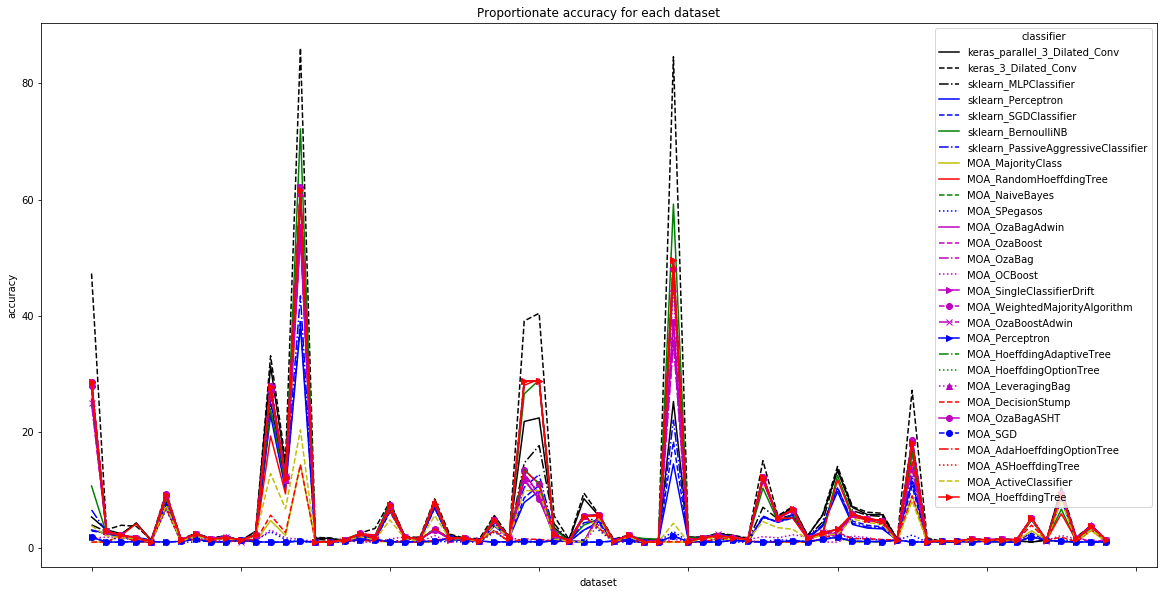

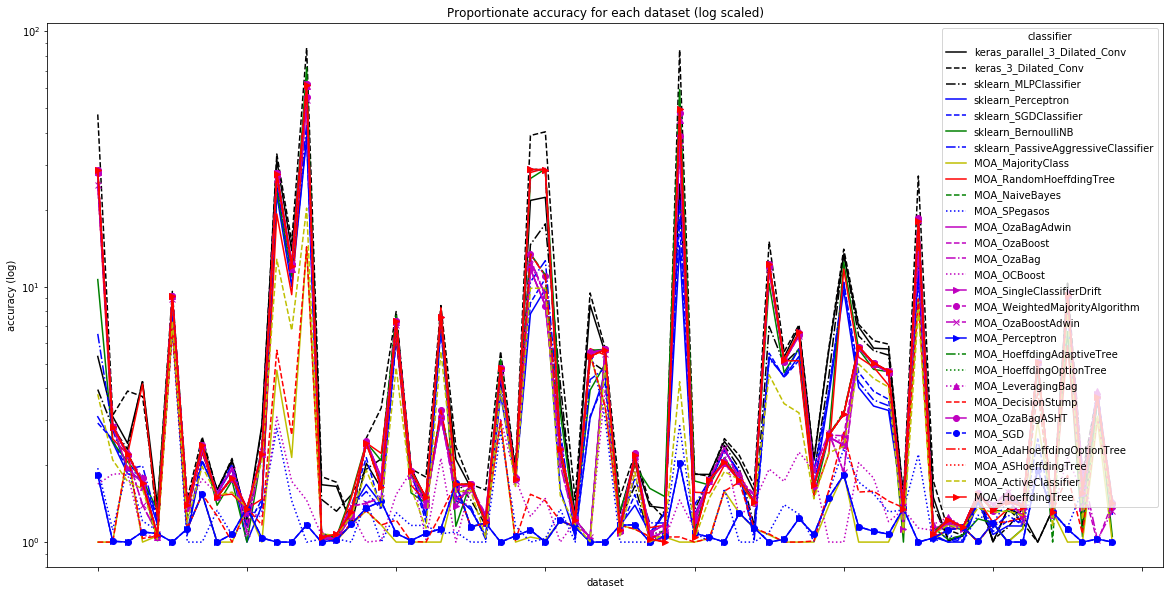

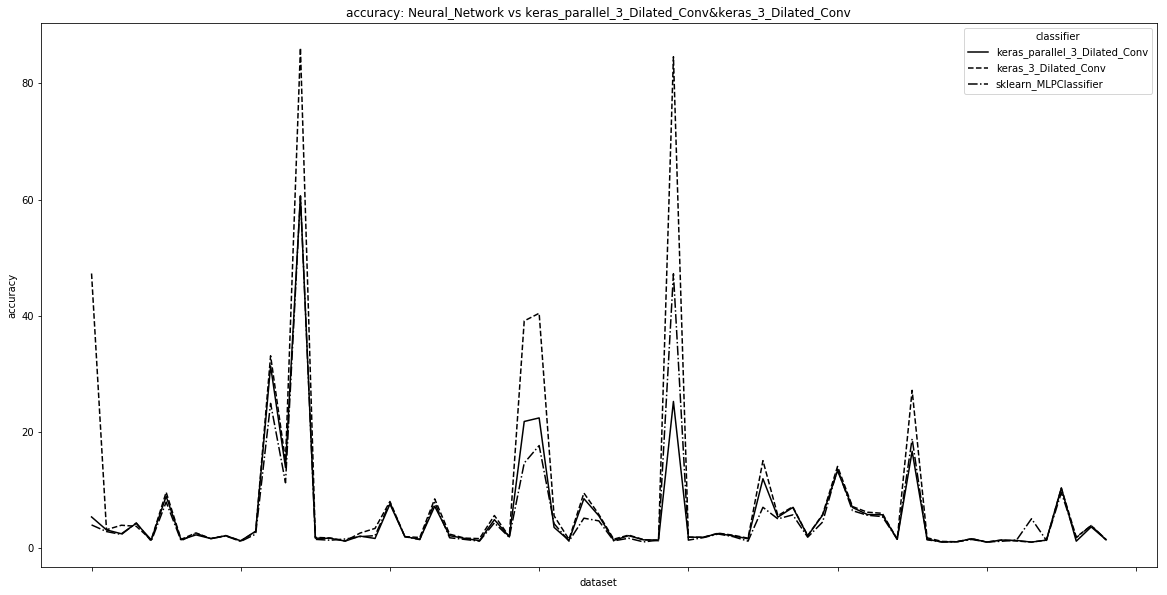

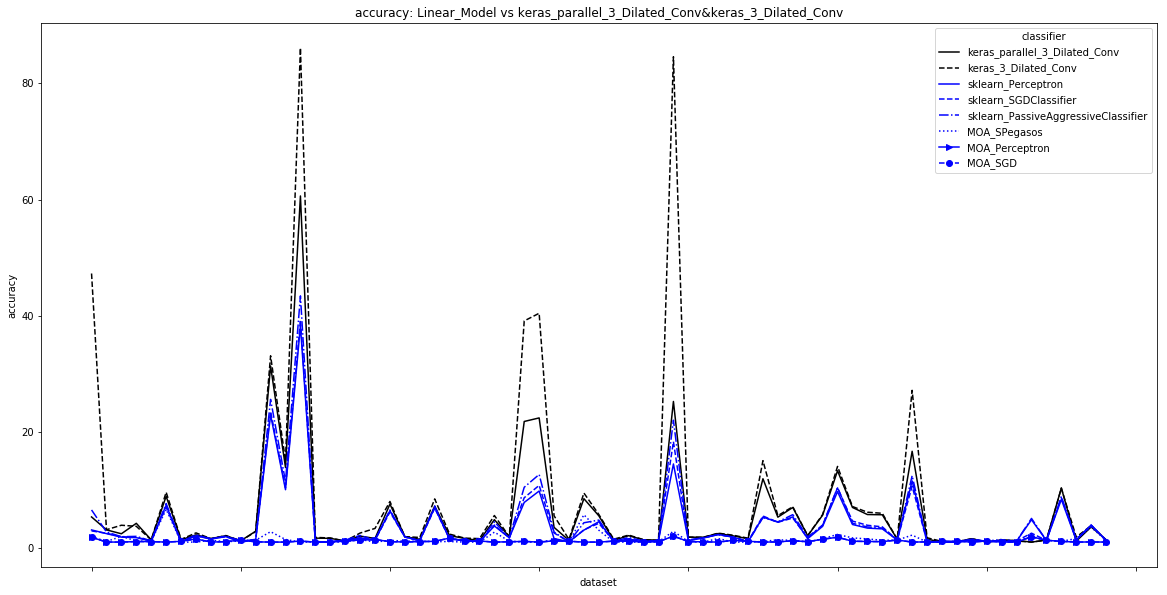

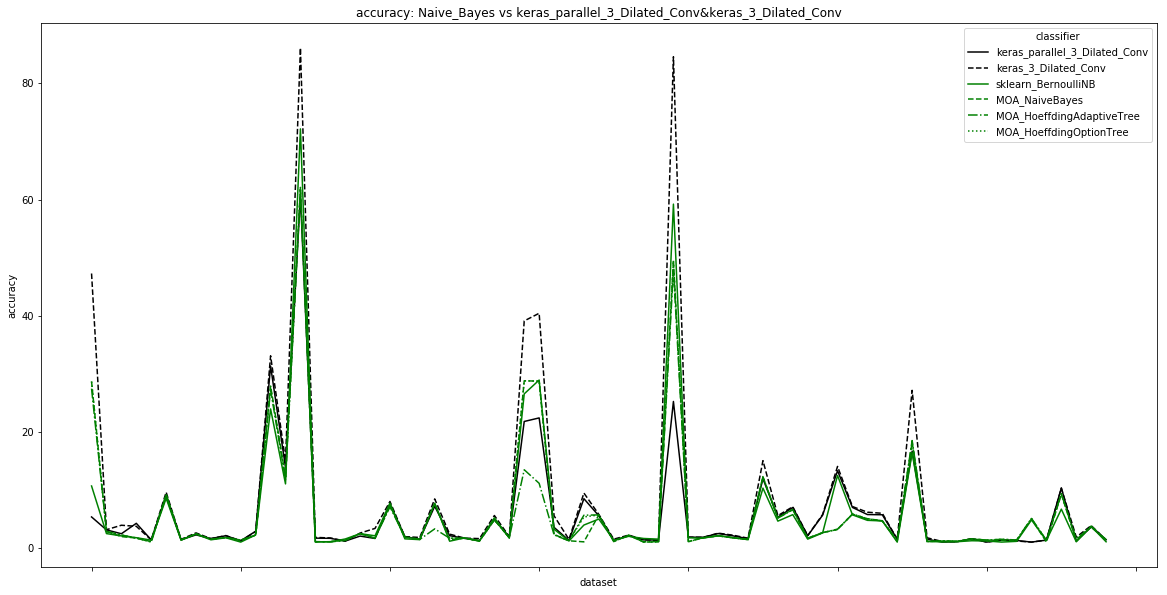

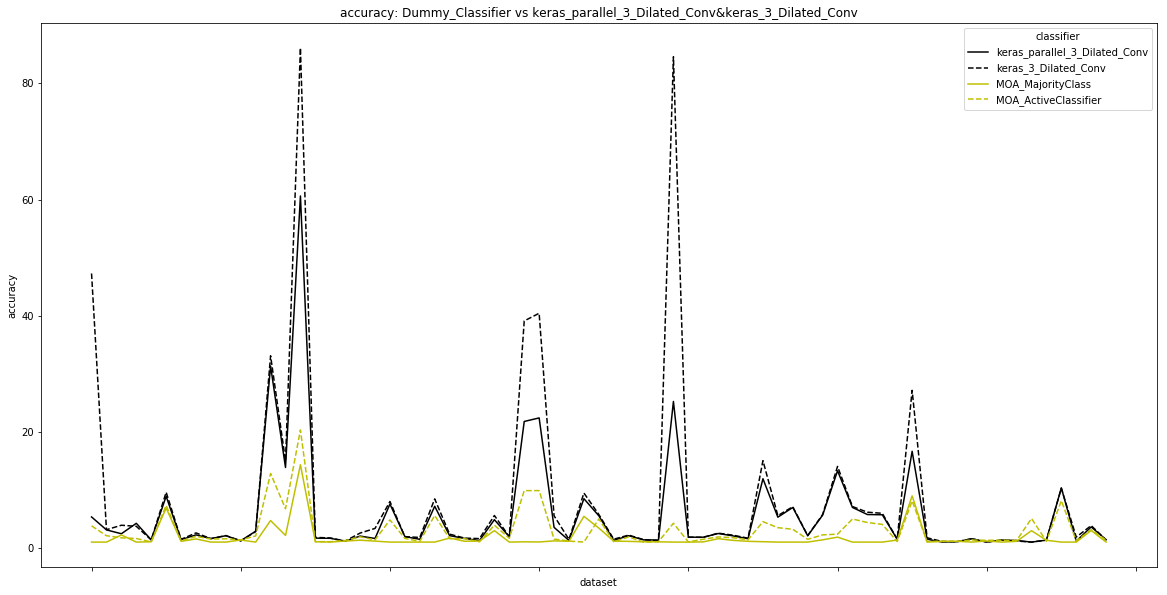

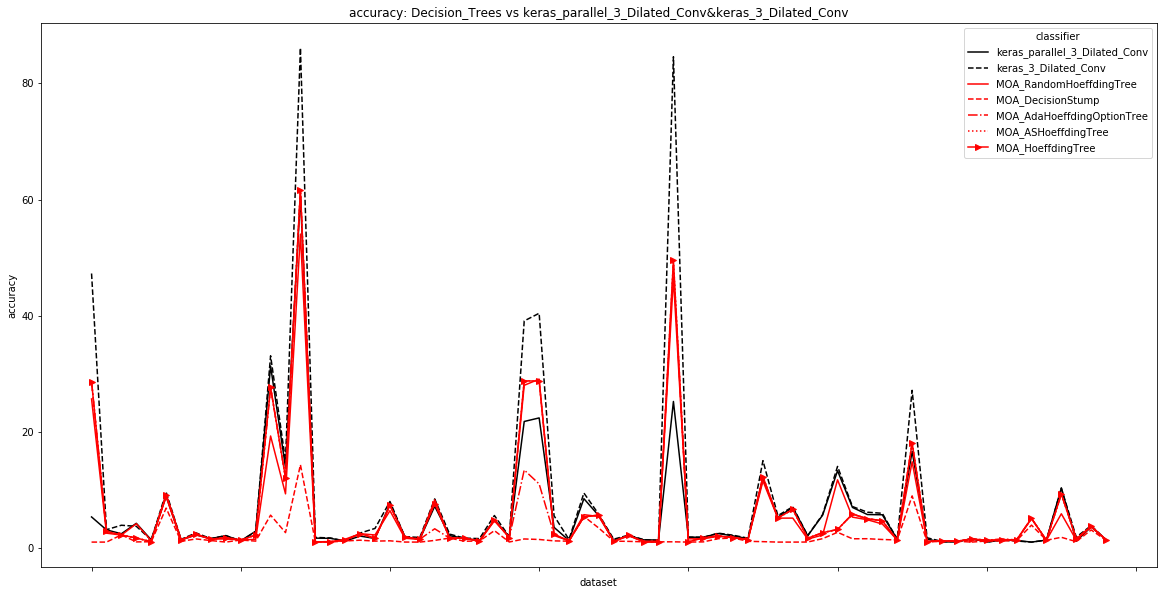

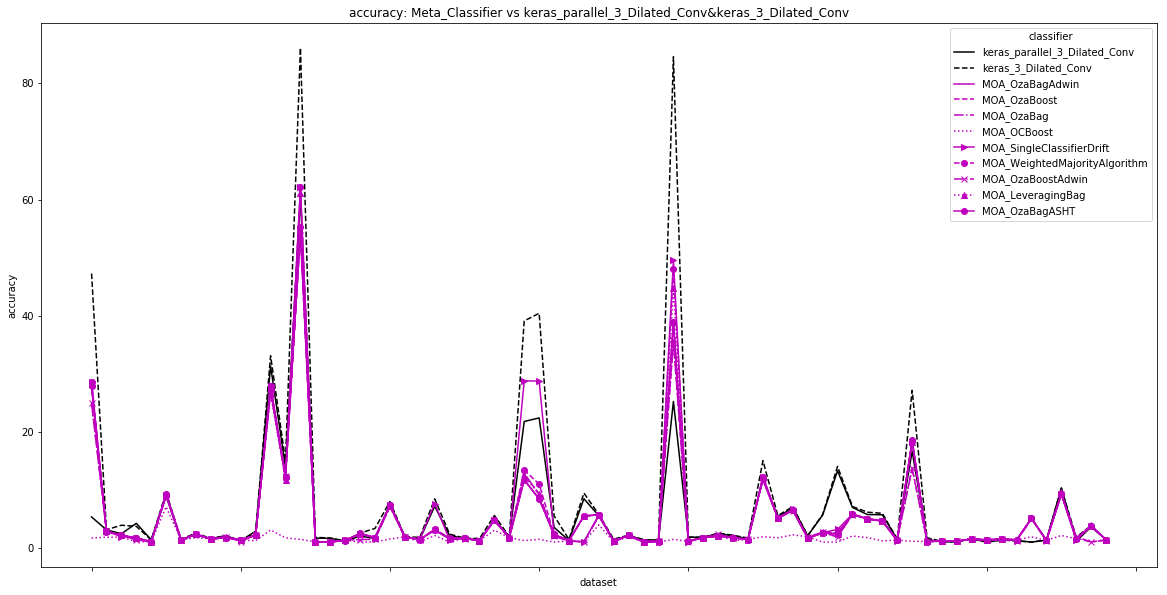

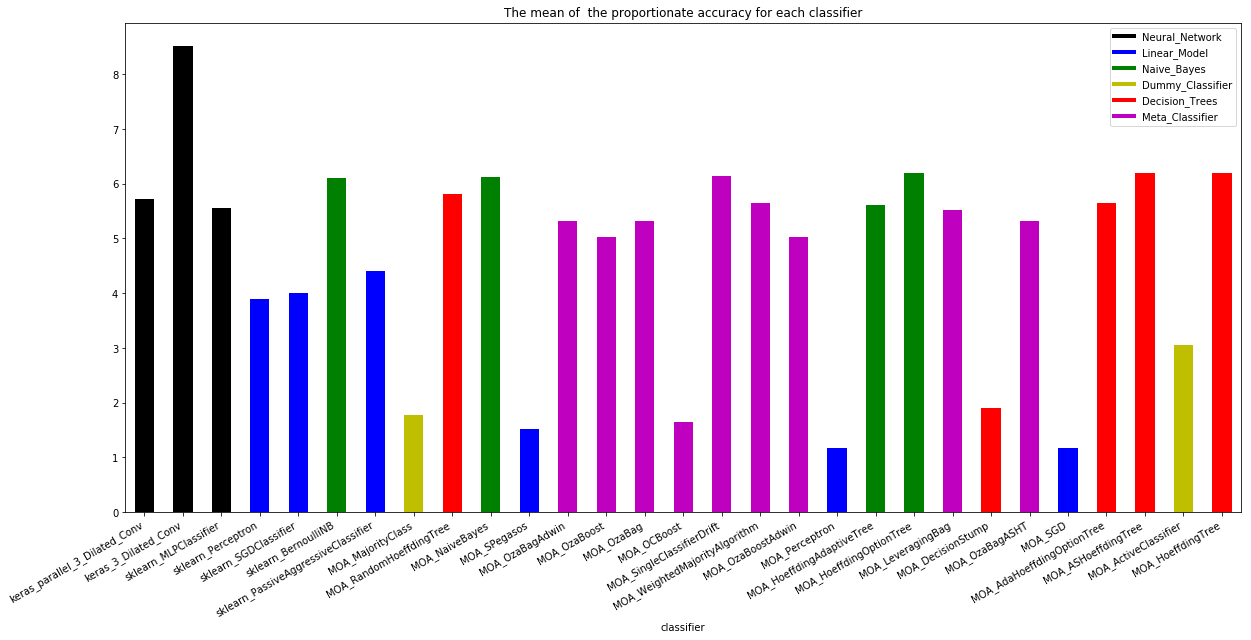

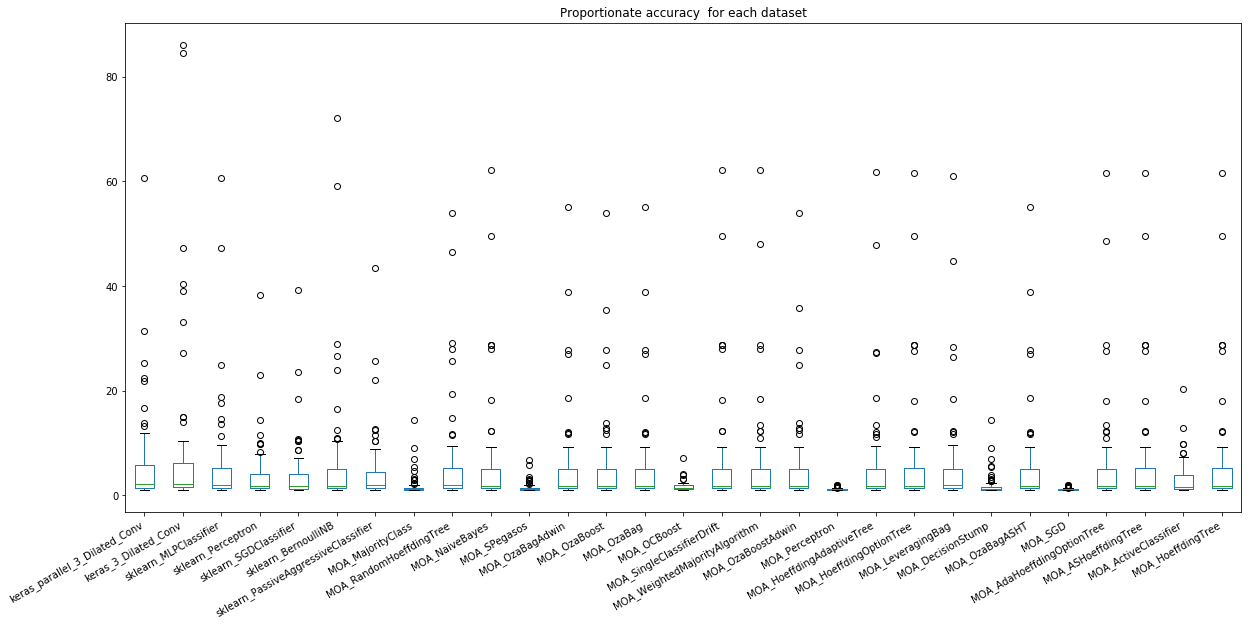

In [14]:
## Plot
ax = metrics_table_proportionate.plot(figsize=(20,10),   style=style, title= 'Proportionate '+_METRIC+' for each dataset' )
ax.set_ylabel(_METRIC)
ax.get_figure().savefig(directory+'plot_prop.png')
plt.show()

ax_log = metrics_table_proportionate.plot(figsize=(20,10),   style=style, title= 'Proportionate '+_METRIC+' for each dataset (log scaled)' , logy=True)
ax_log.set_ylabel(_METRIC+' (log)')
ax_log.get_figure().savefig(directory+'plot_log_prop.png')
plt.show()

pdf_img_ls = [directory+'plot_prop.png', directory+'plot_log_prop.png']

for family in family_label.keys():
    classifiers_to_plot = [classifier for (classifier,f) in classifier_family.items() if f==family or classifier in classifier_to_compare]
    color_aux = [family_color[classifier_family[classifier]] for classifier in classifiers_to_plot]
    line_aux = [line_style[family_classifier[classifier_family[classifier]].index(classifier)] for classifier in classifiers_to_plot]
    style_aux = [c+s for c,s in list(zip(color_aux,line_aux))]
    metrics_table_aux = metrics_table_proportionate[classifiers_to_plot]
    ax = metrics_table_aux.plot(figsize=(20,10), style=style_aux, title= _METRIC+': '+family_label[family]+' vs '+'&'.join(classifier_to_compare) )
    ax.set_ylabel(_METRIC)
    ax.get_figure().savefig(directory + 'plot_' + family +'_prop.png')
    plt.show()
    pdf_img_ls.append(directory + 'plot_' + family +'_prop.png')

## Bar plot (mean)
legend = [Line2D([0], [0], color=c, lw=4, label=family_label[f]) for f,c in family_color.items()]

ax = metrics_table_proportionate.mean().plot.bar(figsize=(20,10), color=color, title= 'The mean of  the proportionate '+_METRIC+' for each classifier')
ax.legend(handles=legend)
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'mean_prop.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'mean_prop.png']
                           
#ax_log = metrics_table_proportionate.mean().plot.bar(figsize=(20,10), color=color, logy=True, title= 'The mean of  the proportionate '+_METRIC+' for each classifier (log scaled)')
#ax_log.legend(handles=legend)
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'mean_log_prop.png')
#plt.show()
#pdf_img_ls = pdf_img_ls + [directory+'mean_log_prop.png']

## Box Plot 
ax = metrics_table_proportionate.plot.box(figsize=(20,10), title= 'Proportionate '+_METRIC+'  for each dataset')
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'box_prop.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'box_prop.png']
                           
#ax_log = metrics_table_proportionate.plot.box(figsize=(20,10), logy=True, title= 'Proportionate '+_METRIC+'  for each dataset (log scaled)')
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'box_log_prop.png')
#plt.show()
#pdf_img_ls = pdf_img_ls +  [directory+'box_log_prop.png']

## Save plots as pdf

In [15]:
pdf_img_ls = [Image.open(i).convert('RGB') for i in pdf_img_ls]
pdf_filename = directory+_METRIC+'_prop.pdf'
first = pdf_img_ls[0].copy()
first.save(pdf_filename,"PDF", resolution=100.0, save_all=True, append_images=pdf_img_ls[1:])
pdf_img_ls = []